#In this exercise we are just simulating a simple rod rotating around an axis, and calculating the velocity and acceleration
#of the rod given some initial parameters. We will use Kinematics to then split the velocity and acceleration of the rod into various
#components in the tangential and radial directions, in order to better understand the expected motion and potential forces acting on the rod


![Simple Pendulum](CNX_UPhysics_10_01_Circle.jpg)                        <img src="polar.jpg" alt="Kinematics" width="500"/>    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
#Initial parameters
L = 2.0             # Length of rod
omega = 1.0         # Constant angular velocity w (rad/s)  (dθ/dt)
alpha_1 = 0.0         # Constant angular acceleration a (rad/s²) (d^2θ/dt^2)
dotL = 0.0
ddotL = 0.0

In [3]:
#Calculate magnitude of tangential and radial velocities and accelerations
v_tangent = L*omega
v_radial = dotL
a_tangent = L*alpha_1 + 2*dotL*omega
a_radial = ddotL - L*omega**2
print( "Tangential Velocity:", v_tangent ,"m/s",
       "\nRadial Velocity:", v_radial, "m/s",
       "\nTangential Acceleration:" ,a_tangent ,"m/s^2",
       "\nRadial Acceleration:", a_radial ,"m/s^2")

Tangential Velocity: 2.0 m/s 
Radial Velocity: 0.0 m/s 
Tangential Acceleration: 0.0 m/s^2 
Radial Acceleration: -2.0 m/s^2


In [11]:
# Parameters
R = 2.0
omega_init = 0.5
alpha = 0.1

dt = 0.05
t_end = 10
time = np.arange(0, t_end, dt)

<img src="ey.jpg" alt="ey" width="300"/>   

In [12]:
# Precompute motion
theta_vals = []
pos_vals = []
v_vals = []
a_vals = []

theta = 0.0
omega = omega_init

In [13]:
for t in time:
    omega += alpha * dt
    theta += omega * dt
    theta_vals.append(theta)

    e_r = np.array([np.cos(theta), np.sin(theta)])
    e_theta = np.array([-np.sin(theta), np.cos(theta)])

    pos = R * e_r
    pos_vals.append(pos)

    velocity = omega * R * e_theta
    v_vals.append(velocity)

    a_radial = -omega**2 * R
    a_tangent = alpha * R
    acceleration = a_radial * e_r + a_tangent * e_theta
    a_vals.append(acceleration)

In [14]:
# === Tip position ===
x = R * np.cos(theta)  #This is just the x coordinate of the end of the Rod
y = R * np.sin(theta)  #This is just the y coordinate of the end of the Rod

# === Unit vectors ===
er_x = 1 * np.cos(theta) # This is just the length of the x and y components of our er vector.
er_y = 1* np.sin(theta)
etheta_x = -np.sin(theta)
etheta_y = np.cos(theta)

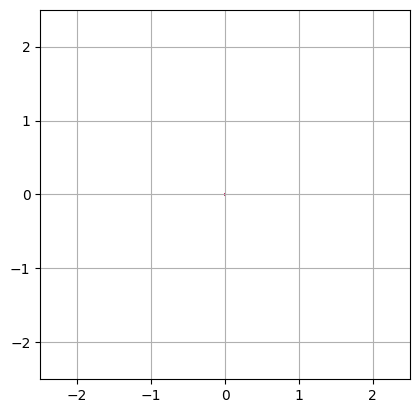

In [15]:
# Plot setup. All this does is uses some matplot lib functions to let us plot the rod moving. Then quiver lets us plot a arrow
# with magnitude of those velocities and accelerations we calculated early. Finally we will put labels to keep track of what is what.
fig, ax = plt.subplots()
ax.set_xlim(-R - 0.5, R + 0.5)
ax.set_ylim(-R - 0.5, R + 0.5)
ax.set_aspect('equal')
ax.grid()

rod, = ax.plot([], [], 'k-', lw=2)
v_arrow = ax.quiver(0, 0, 0, 0, color='blue', angles='xy', scale_units='xy', scale=1)
a_arrow = ax.quiver(0, 0, 0, 0, color='red', angles='xy', scale_units='xy', scale=1)
v_label = ax.text(0, 0, '', color='blue', fontsize=10)
a_label = ax.text(0, 0, '', color='red', fontsize=10)

In [16]:
#This is a function that will take every time frame and plot the current rod position, then plot velocity and acceleration arrows by 
#offsetting their position to lie on top of the tip. Finally, to plot labels, we plot them at the position of the end of the arrows.
def update(frame):
    pos = pos_vals[frame]
    v = v_vals[frame]
    a = a_vals[frame]

    rod.set_data([0, pos[0]], [0, pos[1]]) # Just draws a line from origin to rod tip. From x coordinate of 0 to x coord of rod tip
    

    # Velocity arrow + label at tip
    v_arrow.set_offsets([pos])
    v_arrow.set_UVC(v[0], v[1])
    v_tip = pos + v
    v_label.set_position((v_tip[0] + 0.05, v_tip[1] + 0.05))
    v_label.set_text("Velocity")

    # Acceleration arrow + label at tip
    a_arrow.set_offsets([pos])
    a_arrow.set_UVC(a[0], a[1])
    a_tip = pos + a
    a_label.set_position((a_tip[0] + 0.05, a_tip[1] + 0.05))
    a_label.set_text("Acceleration")

    return rod, v_arrow, a_arrow, v_label, a_label

In [17]:
from IPython.display import HTML
ani = animation.FuncAnimation(fig, update, frames=len(time), interval=50, blit=True)
HTML(ani.to_jshtml())